In [27]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import joblib

## <span style="color: #20C997;">Overall Analyzing of Linear Regression Task</span>
I worked on the Appliances Energy Prediction dataset, which has 29 columns and 19735 rows. My goal is to predict the energy consumption.<br> The dataset does not have any missing values or duplicated rows either
But it has huge number of outliers. I tried to replace he outliers of light with medina/mean but the whole column got replaced with the zero, I had the same problem even when I removed outliers. 
I converted zero values to  Zero and non-zero to 1 in the column 'lights' to make it a binary column. I used RFE to pick up the important features.<br> After that, I trained the linear regression model, but the model  isn not great.
I trained  XGBoost and others models with same dataset. XGboost and Extra Tress Regressor models are better than the linear regression model.
I think the problem is with split, it splits the  whole dataset so the model can not see all the  data.<br> Getting examples from each group would a better idea what you did in advanced Data Analysis course with vine dataset. but  this dataset is linear it would be a bt tricky, I will work on this  later.

### Column Descriptions
- **date time**: Year-Month-Day Hour:Minute:Second
- **Appliances**: Energy use of appliances in Wh
- **lights**: Energy use of light fixtures in the house in Wh
- **T1**: Temperature in kitchen area, in Celsius
- **RH_1**: Humidity in kitchen area, in %
- **T2**: Temperature in living room area, in Celsius
- **RH_2**: Humidity in living room area, in %
- **T3**: Temperature in laundry room area, in Celsius
- **RH_3**: Humidity in laundry room area, in %
- **T4**: Temperature in office room, in Celsius
- **RH_4**: Humidity in office room, in %
- **T5**: Temperature in bathroom, in Celsius
- **RH_5**: Humidity in bathroom, in %
- **T6**: Temperature outside the building (north side), in Celsius
- **RH_6**: Humidity outside the building (north side), in %
- **T7**: Temperature in ironing room, in Celsius
- **RH_7**: Humidity in ironing room, in %
- **T8**: Temperature in teenager room 2, in Celsius
- **RH_8**: Humidity in teenager room 2, in %
- **T9**: Temperature in parents room, in Celsius
- **RH_9**: Humidity in parents room, in %
- **To**: Temperature outside (from Chievres weather station), in Celsius
- **Pressure**: Pressure (from Chievres weather station), in mm Hg
- **RH_out**: Humidity outside (from Chievres weather station), in %
- **Wind speed**: Wind speed (from Chievres weather station), in m/s
- **Visibility**: Visibility (from Chievres weather station), in km
- **Tdewpoint**: Dewpoint temperature (from Chievres weather station), in Celsius
- **rv1**: Random variable 1, nondimensional
- **rv2**: Random variable 2, nondimensional


In [28]:
# Loading and Exploring the data 
data = pd.read_csv('energydata_complete.csv')

In [29]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [30]:
# Check for duplicates 
data.duplicated().sum()

0

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [32]:
# All columns are numerical except for date and time columns
# I need to convert the date and time columns to datetime objects
data['date'] = pd.to_datetime(data['date'])

In [33]:
data['date']

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

In [34]:
# It has year, month, day, hour and minute, so I need to extract the year, month, day and hour
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data = data.drop('date', axis=1)

In [35]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,17
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11,17
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11,17


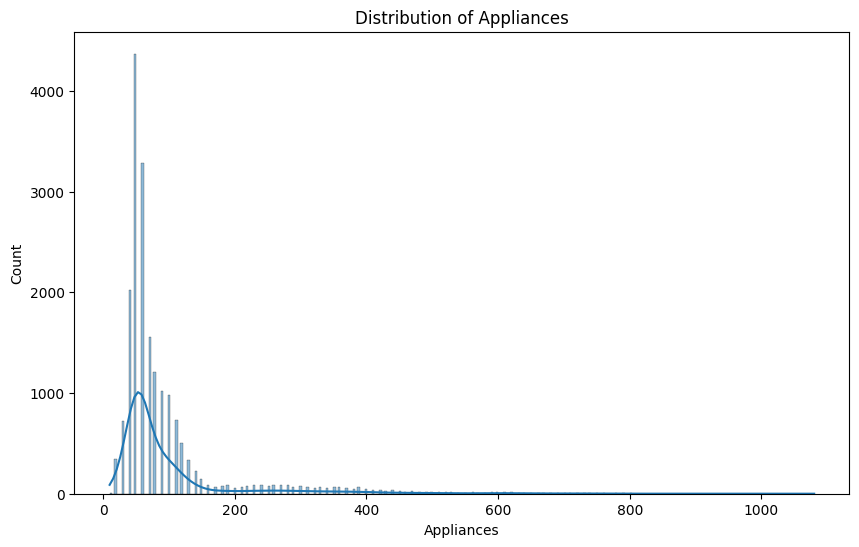

In [36]:
# There many columns have outliers, specifically the Appliances which is the target variable
# let's visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Appliances'], kde=True)
plt.title('Distribution of Appliances')
plt.show()


## <span style="color: #20C997;">Personal Analysis</span>
<li>Most appliances use small amounts of energy (less than 100).
<li>A few appliances use close to 1000, which makes the average higher.
<li>The kurtosis is very high, this means that the data has a lot of outliers.
<li>The mean is much higher than the median because some really big numbers.
<li> In nutshell data is not balanced.

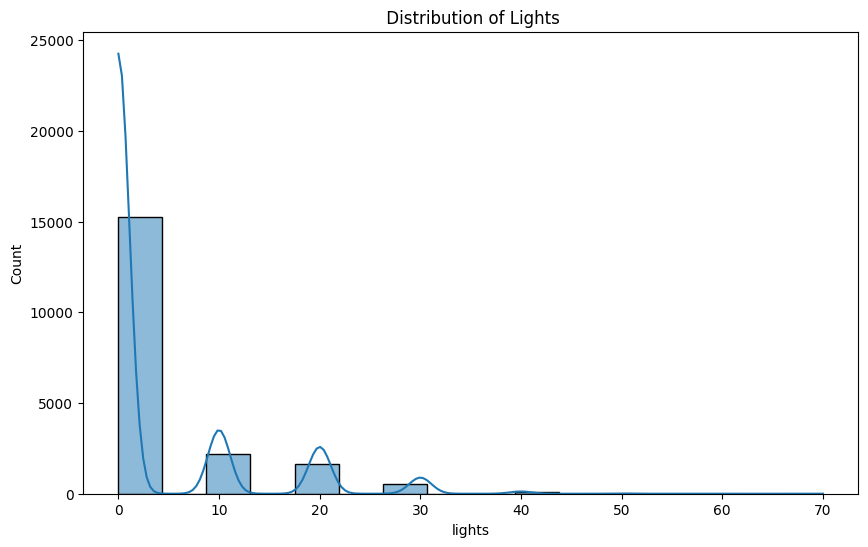

In [37]:
# visualizing the light column 
plt.figure(figsize=(10, 6))
sns.histplot(data['lights'], kde=True)
plt.title(' Distribution of Lights')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li>Most of the time, the house spends little or no energy for lighting lights off.
<li>Medium energy use happens usually when some lights are turned on.
<li>Rarely, the energy goes to high levels (70 Wh)

In [38]:
# let's find outliers in the dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
Appliances,2138
lights,4483
T1,515
RH_1,146
T2,546
RH_2,235
T3,217
RH_3,15
T4,186
RH_4,0


In [39]:
# Appliance and lights are positive skewed, so I will use the median to impute the outliers

"""
imputer_median = SimpleImputer(strategy='median')

data['Appliances'] = data['Appliances'].clip(lower=Q1['Appliances'] - 1.5 * IQR['Appliances'], upper=Q3['Appliances'] + 1.5 * IQR['Appliances'])
data['Appliances'] = imputer_median.fit_transform(data[['Appliances']])

data['lights'] = data['lights'].clip(lower=Q1['lights'] - 1.5 * IQR['lights'], upper=Q3['lights'] + 1.5 * IQR['lights'])
data['lights'] = imputer_median.fit_transform(data[['lights']])

"""

"\nimputer_median = SimpleImputer(strategy='median')\n\ndata['Appliances'] = data['Appliances'].clip(lower=Q1['Appliances'] - 1.5 * IQR['Appliances'], upper=Q3['Appliances'] + 1.5 * IQR['Appliances'])\ndata['Appliances'] = imputer_median.fit_transform(data[['Appliances']])\n\ndata['lights'] = data['lights'].clip(lower=Q1['lights'] - 1.5 * IQR['lights'], upper=Q3['lights'] + 1.5 * IQR['lights'])\ndata['lights'] = imputer_median.fit_transform(data[['lights']])\n\n"

In [40]:
#imputer_median = SimpleImputer(strategy='mean')
#data['lights'] = data['lights'].clip(lower=Q1['lights'] - 1.5 * IQR['lights'], upper=Q3['lights'] + 1.5 * IQR['lights'])
#data['lights'] = imputer_median.fit_transform(data[['lights']])

In [41]:
# For the rest of the columns which have outliers , I will impute the outliers with the mean value
# I need to filter the columns with outliers, before this I did not filers the columns with outliers, it worked for whole dataset.
# columns_outliers = outliers[outliers['Outliers'] > 0].index.tolist()
# I replaced outliers with median value for Appliances and lights, I filtered them out

"""
columns_impute = [col for col in columns_outliers if col not in ['Appliances', 'lights']]

imputer_mean = SimpleImputer(strategy='mean')
for col in columns_impute:
    data[col] = data[col].clip(lower=Q1[col] - 1.5 * IQR[col], upper=Q3[col] + 1.5 * IQR[col])
    data[col] = imputer_mean.fit_transform(data[[col]])
    
"""
# I wanted to replaced the light column's outliers with the median value, but after imputing the outliers with median value, All values got zero.
# Then I decided to replace the outliers with the mean value. But I got the same result.
# I removed the outliers from the light column, but the values are still zero.
# I wait for your feedback to solve this problem.

"\ncolumns_impute = [col for col in columns_outliers if col not in ['Appliances', 'lights']]\n\nimputer_mean = SimpleImputer(strategy='mean')\nfor col in columns_impute:\n    data[col] = data[col].clip(lower=Q1[col] - 1.5 * IQR[col], upper=Q3[col] + 1.5 * IQR[col])\n    data[col] = imputer_mean.fit_transform(data[[col]])\n    \n"

In [42]:
# I got the reason why the light column gets zero values, when I impute the outliers with the median/ mean value, even though I removed the outliers.
# Median is zero already so when I impute the outliers with the mean value, values get zero.
# When I impute the outliers with the mean( mean is 3.8) value, but the values get still zero.
# because light column has many zero values and when I clip the outliers, the values get close to the original data, which is already zero.
# Also when I removed the outliers, the values get zero again because the higher values are removed and majority values which is zero remains.

# When I faced this problem, I went to to check Kaggle that, how others people handle this problem, but there cleaned dataset is used.
# I explained this issue to ChatGPT, it said there is a problem with distribution of the data.

# And then I read this page to learn about the issue : https://datascience.stackexchange.com/questions/128024/outlier-handing-when-most-value-is-0

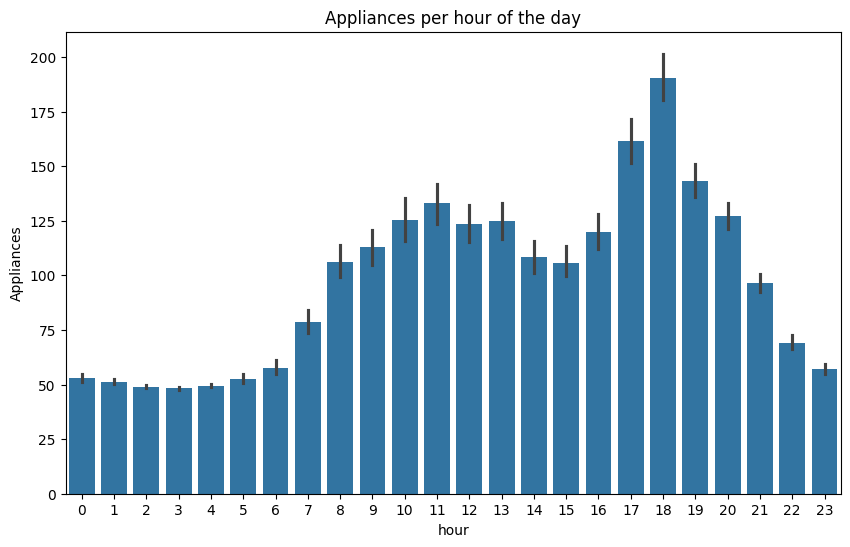

In [43]:
# Visualizing the energy consumption per hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='Appliances', data=data)
plt.title('Appliances per hour of the day')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li> Energy consumption is highest between 5 PM and 8 PM, it makes sense because people are at home during this time.
<li> Energy consumption is lowest from midnight to 5 AM, when people are  sleeping.

In [44]:
# I found many options to handle the outliers such as separating Zero vs. Non-Zero, using the log transformation and DBSCAN
# I will group the data into two groups, zero with zero values(off) and 1 for the other with non-zero values(on)
data['lights'] = data['lights'].apply(lambda x: 0 if x == 0 else 1)

# Sources:
# https://blog.dailydoseofds.com/p/how-zero-inflated-datasets-can-ruin
# https://anshikaaxena.medium.com/how-skewed-data-can-skrew-your-linear-regression-model-accuracy-and-transfromation-can-help-62c6d3fe4c5d

In [45]:
# For the rest of columns which have outliers, I impute the outliers with the mean value
# I need to filter the columns with outliers
columns_outliers = outliers[outliers['Outliers'] > 0].index.tolist()
# I have to remove the lights column from the columns_outliers list
columns_impute = [col for col in columns_outliers if col not in [ 'lights']]
imputer_mean = SimpleImputer(strategy='mean')
for col in columns_impute:
    lower_bound = data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))
    upper_bound = data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    data[col] = imputer_mean.fit_transform(data[[col]])

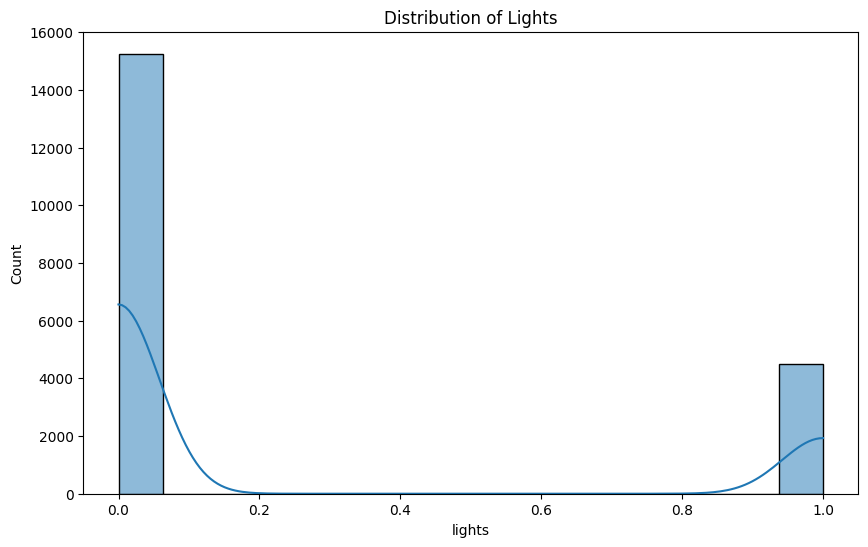

In [46]:
# Check out the distribution of the lights column
plt.figure(figsize=(10, 6))
sns.histplot(data['lights'], kde=True)
plt.title('Distribution of Lights')
plt.show()

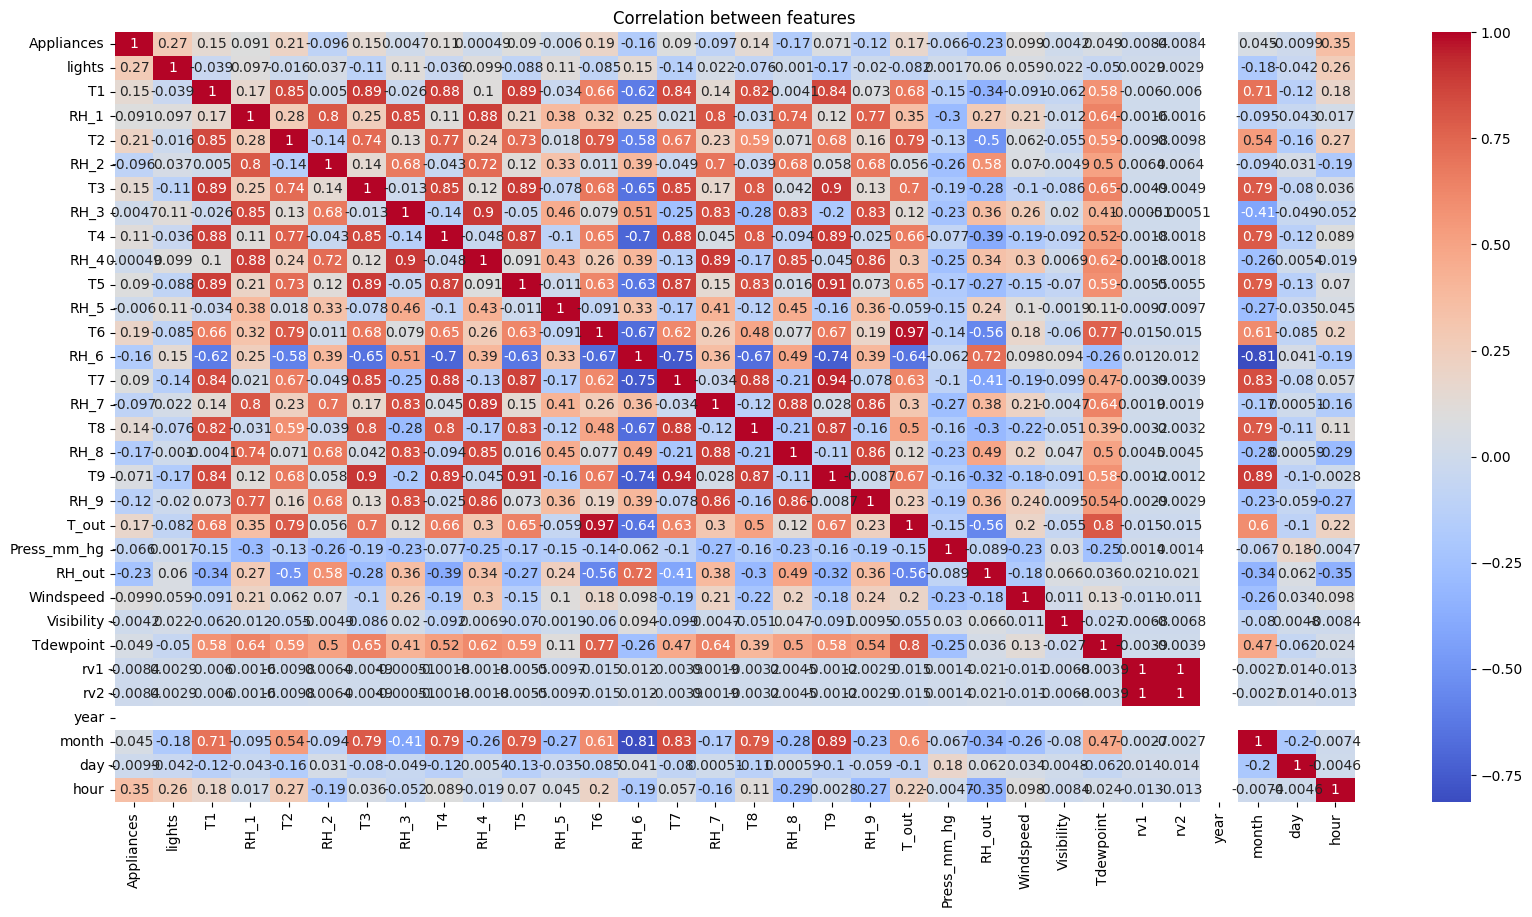

In [47]:
# Let's analyzing the correlation between the features
correlation = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li>T6 has very strong positive correlation with T_out
<li> T8 has strong correlation with T9
<li>RH_5 has high correlation with RH_6
<li> Lights and Appliance have weak negative correlation.
<li> There are no strongly correlated for Appliances.

In [48]:
# Checking the multicollinearity between the features
X = data.drop('Appliances', axis=1)
y = data['Appliances']

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

c:\Users\murta\Desktop\Desktop\ML&DE\second-semester\Introduction-Machine-Learning\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,lights,1.265732e+00
1,T1,1.984057e+01
2,RH_1,1.500249e+01
3,T2,2.448582e+01
4,RH_2,1.653934e+01
5,T3,1.094938e+01
6,RH_3,1.131853e+01
7,T4,9.551656e+00
8,RH_4,1.784917e+01
9,T5,1.021639e+01


In [49]:
# Checking relationship between the features and the target variable
correlation_target = data.corr()['Appliances'].sort_values(ascending=False)
correlation_target

Appliances     1.000000
hour           0.351102
lights         0.270536
T2             0.209637
T6             0.193672
T_out          0.172535
T1             0.146273
T3             0.145573
T8             0.136025
T4             0.113183
Windspeed      0.098671
RH_1           0.091500
T7             0.090106
T5             0.089531
T9             0.070581
Tdewpoint      0.048584
month          0.044723
RH_3           0.004720
RH_4           0.000489
Visibility    -0.004247
RH_5          -0.006020
rv2           -0.008363
rv1           -0.008363
day           -0.009937
Press_mm_hg   -0.065848
RH_2          -0.095974
RH_7          -0.096975
RH_9          -0.120580
RH_6          -0.163160
RH_8          -0.166790
RH_out        -0.232526
year                NaN
Name: Appliances, dtype: float64

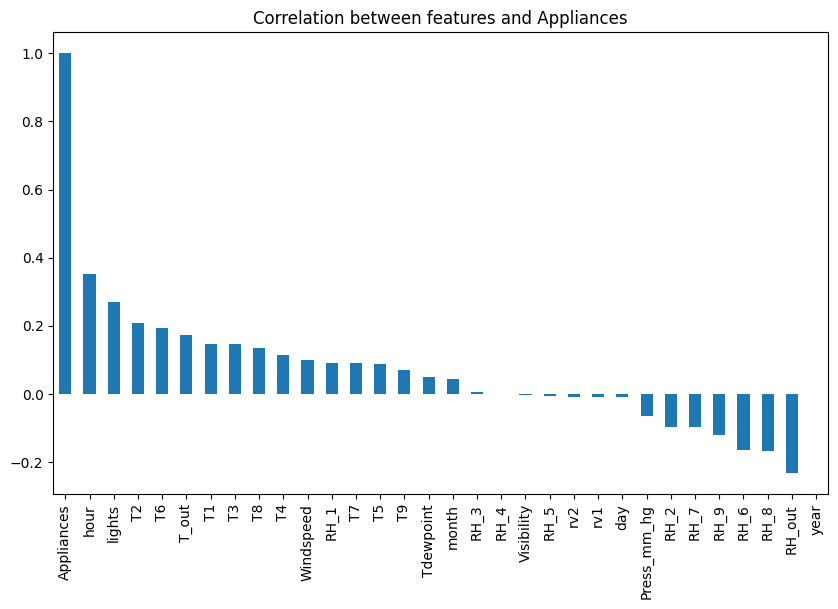

In [50]:
# Let's Visualize the correlation_target
plt.figure(figsize=(10, 6))
correlation_target.plot(kind='bar')
plt.title('Correlation between features and Appliances')    
plt.show()

In [51]:
# I drop the year column 
data = data.drop('year', axis=1)

In [52]:
model = RandomForestRegressor(random_state=42)

rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
filtered_data = data[selected_features.union(['Appliances'])]

In [53]:
filtered_data.head()  

,Appliances,Press_mm_hg,RH_3,RH_8,RH_9,T3,T4,T8,T_out,Tdewpoint,hour
0,60.0,735.933333,44.730000,48.900000,45.53,19.79,19.000000,18.2,6.600000,5.3,17
1,60.0,735.933333,44.790000,48.863333,45.56,19.79,19.000000,18.2,6.483333,5.2,17
2,50.0,735.933333,44.933333,48.730000,45.50,19.79,18.926667,18.2,6.366667,5.1,17
3,50.0,735.933333,45.000000,48.590000,45.40,19.79,18.890000,18.1,6.250000,5.0,17
4,60.0,735.933333,45.000000,48.590000,45.40,19.79,18.890000,18.1,6.133333,4.9,17


<p> When I found correlations between Appliance and features, The lights columns has highest relationship with Appliance, when I used RFE to pick up 10  most important features for target value, I expected that the light columns must be one of them because it has low mutlicolinnearity with Appliance. But it seems that RFE does not like redundancy, and Light is removed. I searched about it and I found this: correlation measures the strength of a linear relationship. RFE chooses only the most useful features to keep the model simple and effective. Lights might not improve accuracy much, so it’s dropped.<br>
Source: https://stats.stackexchange.com/questions/519306/why-important-features-does-not-correlated-with-target-variable

In [54]:
# Save the filtered dataset
filtered_data.to_csv('filtered_energydata.csv', index=False)

In [55]:
df = pd.read_csv('filtered_energydata.csv')

In [56]:
# These columns have highest impact on the Appliances
# But the name columns are not clear, I have to rename them with clear names.
df = df.rename(columns = {'RH_3': 'Laundry_Humidity', 'RH_8': 'Teenager_Room_Humidity', 'RH_9': 'Parents_Room_Humidity',
                          'T3': 'Laundry_Temperature','T4':'Office_Temperature', 'T8': 'Teenager_Room_Temperature', 'T9': 'Parents_Room_Temperature',
                          'T_out': 'Outside_Temperature', 'Tdewpoint': 'Dew_Point_Temperature'})
df.head()   

,Appliances,Press_mm_hg,Laundry_Humidity,Teenager_Room_Humidity,Parents_Room_Humidity,Laundry_Temperature,Office_Temperature,Teenager_Room_Temperature,Outside_Temperature,Dew_Point_Temperature,hour
0,60.0,735.933333,44.730000,48.900000,45.53,19.79,19.000000,18.2,6.600000,5.3,17
1,60.0,735.933333,44.790000,48.863333,45.56,19.79,19.000000,18.2,6.483333,5.2,17
2,50.0,735.933333,44.933333,48.730000,45.50,19.79,18.926667,18.2,6.366667,5.1,17
3,50.0,735.933333,45.000000,48.590000,45.40,19.79,18.890000,18.1,6.250000,5.0,17
4,60.0,735.933333,45.000000,48.590000,45.40,19.79,18.890000,18.1,6.133333,4.9,17


In [57]:
df['hour'].value_counts()

hour
17    828
18    823
15    822
14    822
13    822
12    822
11    822
10    822
9     822
8     822
7     822
6     822
5     822
4     822
3     822
2     822
1     822
0     822
23    822
22    822
21    822
20    822
19    822
16    822
Name: count, dtype: int64

In [58]:
X = df.drop('Appliances', axis=1)
y = df['Appliances'] 

In [59]:
# Using StandardScaler to scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Feed the data into the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Making predictions
prediction = model.predict(X_test)

In [63]:
print(model.intercept_)

78.90161729472568


If all the features (like humidity, temperature, hour, etc.) are zero, the model predicts the baseline energy consumption to be 78.9 Wh

In [64]:
print(model.coef_)

[ -1.23439455  16.81444661 -12.02152327  -7.03132652  10.53236514
  -6.84733845   1.0345491    6.17876616  -4.11933583   9.29719298]


In [65]:
X_features = pd.DataFrame(X, columns=df.drop('Appliances', axis=1).columns)
coefficients = pd.DataFrame({'Feature': X_features.columns, 'Coefficient': model.coef_}).sort_values(by='Coefficient', ascending=False)
coefficients

,Feature,Coefficient
1,Laundry_Humidity,16.814447
4,Laundry_Temperature,10.532365
9,hour,9.297193
7,Outside_Temperature,6.178766
6,Teenager_Room_Temperature,1.034549
0,Press_mm_hg,-1.234395
8,Dew_Point_Temperature,-4.119336
5,Office_Temperature,-6.847338
3,Parents_Room_Humidity,-7.031327
2,Teenager_Room_Humidity,-12.021523


## <span style="color: #20C997;">Personal Analysis</span>
Laundry humidity and temperature increase energy use the most. Teenager, parents rooms's humidity and office temperature decrease it.

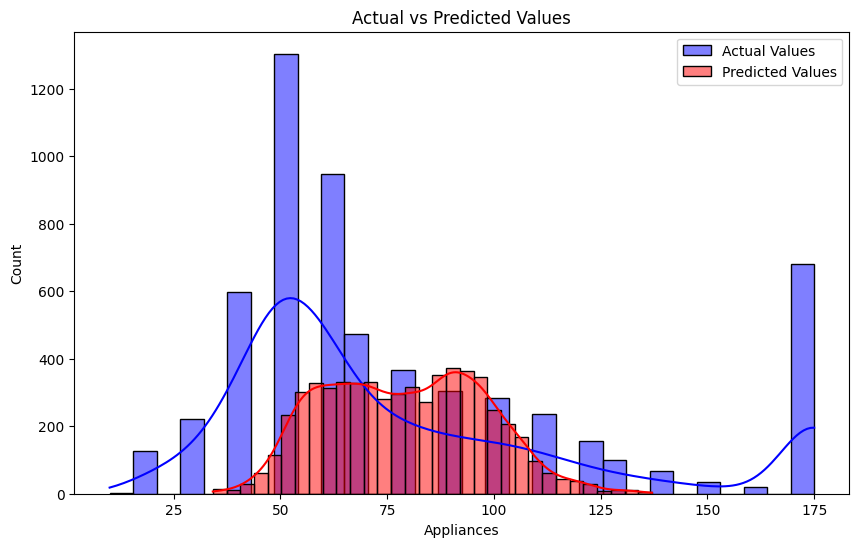

In [66]:
# Visualizing the predictions vs the actual values  
plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=True, color='blue', label='Actual Values')
sns.histplot(prediction, kde=True, color='red', label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()  
# I got the above code from ChatGPT.

## <span style="color: #20C997;">Personal Analysis</span>
The model is not good at predicting appliance energy use, The model's predictions don’t match the actual values well, especially at the peaks around 50 and 175.

In [67]:
# Evaluating the model
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

In [68]:
print(f"Mean Absolute Error (MAE): {mae:.2f} Wh")
print(f"Mean Squared Error (MSE): {mse:.2f} Wh²")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} Wh")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 28.74 Wh
Mean Squared Error (MSE): 1504.04 Wh²
Root Mean Squared Error (RMSE): 38.78 Wh
R² Score: 0.20


## <span style="color: #20C997;">Personal Analysis</span>
The model is not great. On average, predictions are 28.7 Wh and it only explains 20% of the data , so it doesn't fit well.

In [69]:
# Creating new examples for testing the model
new_data = pd.DataFrame({
    'Press_mm_hg': [750],
    'Laundry_Humidity': [45],
    'Teenager_Room_Humidity': [48],
    'Parents_Room_Humidity': [46],
    'Laundry_Temperature': [20],
    'Office_Temperature': [19],
    'Teenager_Room_Temperature': [18],
    'Outside_Temperature': [7],
    'Dew_Point_Temperature': [5],
    'hour': [17]
})

# Scaling the new data
new_data_scaled = scaler.transform(new_data)

# Making predictions with the new data
new_predictions = model.predict(new_data_scaled)
print(f"Predicted energy consumption for the new data: {new_predictions[0]:.2f} Wh")

Predicted energy consumption for the new data: 88.25 Wh


In [70]:
# saving the model and the scaler
joblib.dump(model, 'energy_consumption_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']